In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
# Load and clean the dataset

In [2]:
df = pd.read_csv("datasets/machine failure.csv")

In [3]:
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [5]:
df = df.drop(columns=["UDI", "Product ID"])

In [6]:
df["Type"].unique()

array(['M', 'L', 'H'], dtype=object)

Text(0.5, 1.0, 'Type')

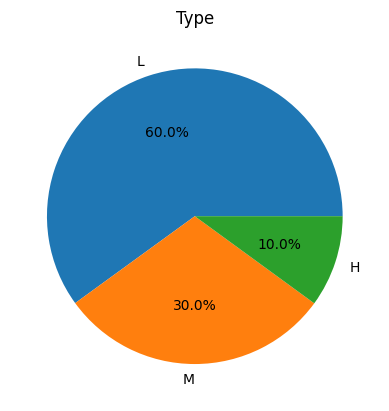

In [8]:
plt.pie(df["Type"].value_counts(), labels=df["Type"].value_counts().index, autopct='%1.1f%%')
plt.title("Type")

In [7]:
from sklearn.preprocessing import LabelEncoder

In [10]:
label_encoder = LabelEncoder()

In [12]:
df["Type"] = label_encoder.fit_transform(df["Type"])

In [15]:
df.dtypes

Type                         int32
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object

In [14]:
df.describe()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,1.19940,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,0.60023,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,0.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1.00000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.00000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,2.00000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,2.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [23]:
df.corr()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
Type,1.000000,0.017599,0.013444,-0.002693,0.004011,-0.003930,-0.005152,-0.005349,0.000108,0.012121,-0.021211,-0.022147
Air temperature [K],0.017599,1.000000,0.876107,0.022670,-0.013778,0.013853,0.082556,0.009955,0.137831,0.003470,0.001988,0.017688
Process temperature [K],0.013444,0.876107,1.000000,0.019277,-0.014061,0.013488,0.035946,0.007315,0.056933,-0.003355,0.004554,0.022279
Rotational speed [rpm],-0.002693,0.022670,0.019277,1.000000,-0.875027,0.000223,-0.044188,0.010389,-0.121241,0.123018,-0.104575,-0.013088
Torque [Nm],0.004011,-0.013778,-0.014061,-0.875027,1.000000,-0.003093,0.191321,-0.014662,0.142610,0.083781,0.183465,0.016136
Tool wear [min],-0.003930,0.013853,0.013488,0.000223,-0.003093,1.000000,0.105448,0.115792,-0.001287,-0.009334,0.155894,0.011326
Machine failure,-0.005152,0.082556,0.035946,-0.044188,0.191321,0.105448,1.000000,0.362904,0.575800,0.522812,0.531083,0.004516
TWF,-0.005349,0.009955,0.007315,0.010389,-0.014662,0.115792,0.362904,1.000000,-0.007332,0.008577,0.038243,0.030970
HDF,0.000108,0.137831,0.056933,-0.121241,0.142610,-0.001287,0.575800,-0.007332,1.000000,0.018443,0.046396,-0.004706
PWF,0.012121,0.003470,-0.003355,0.123018,0.083781,-0.009334,0.522812,0.008577,0.018443,1.000000,0.115836,-0.004273


array([[<Axes: title={'center': 'Type'}>,
        <Axes: title={'center': 'Air temperature [K]'}>,
        <Axes: title={'center': 'Process temperature [K]'}>],
       [<Axes: title={'center': 'Rotational speed [rpm]'}>,
        <Axes: title={'center': 'Torque [Nm]'}>,
        <Axes: title={'center': 'Tool wear [min]'}>],
       [<Axes: title={'center': 'Machine failure'}>,
        <Axes: title={'center': 'TWF'}>, <Axes: title={'center': 'HDF'}>],
       [<Axes: title={'center': 'PWF'}>, <Axes: title={'center': 'OSF'}>,
        <Axes: title={'center': 'RNF'}>]], dtype=object)

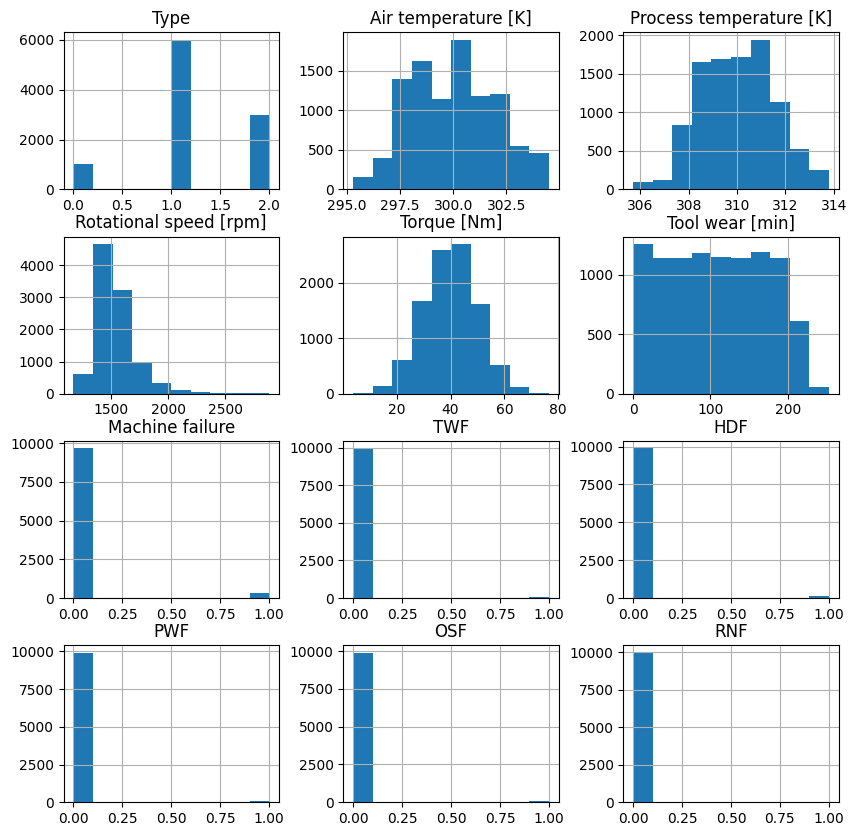

In [26]:
df.hist(figsize=(10, 10), bins=10)

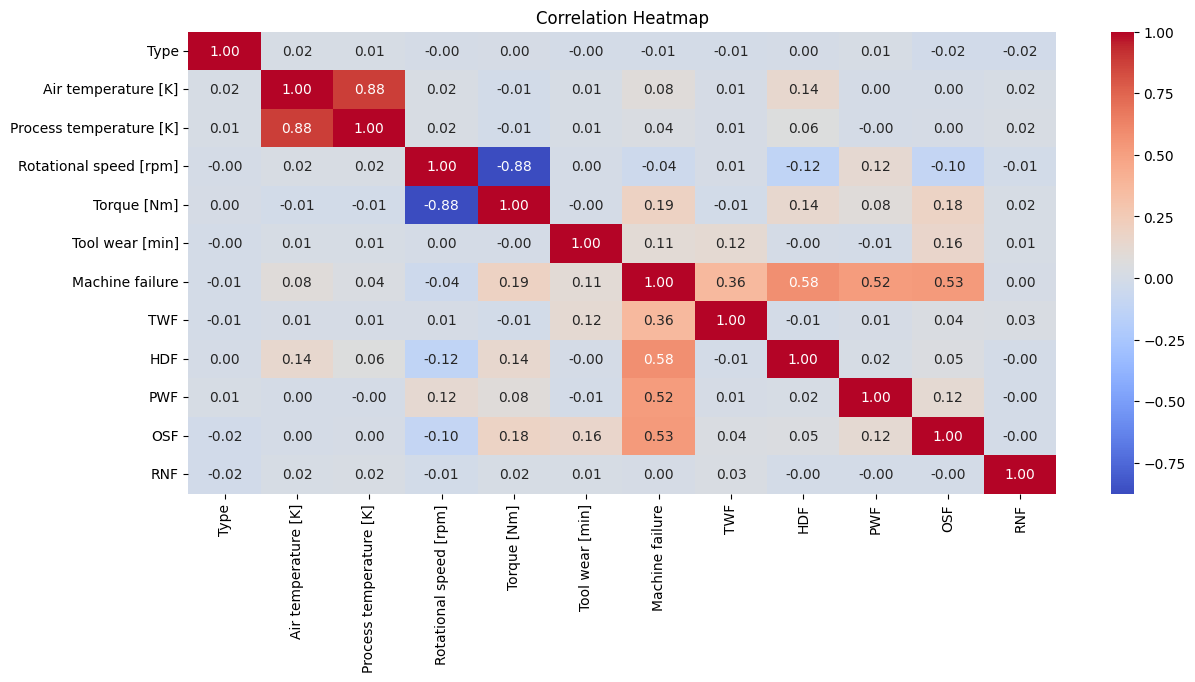

In [28]:
plt.figure(figsize=(14, 6))
sb.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [31]:
df.corrwith(df["Machine failure"])

Type                      -0.005152
Air temperature [K]        0.082556
Process temperature [K]    0.035946
Rotational speed [rpm]    -0.044188
Torque [Nm]                0.191321
Tool wear [min]            0.105448
Machine failure            1.000000
TWF                        0.362904
HDF                        0.575800
PWF                        0.522812
OSF                        0.531083
RNF                        0.004516
dtype: float64

In [56]:
df.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

In [58]:
# Train models

In [59]:
from sklearn.model_selection import train_test_split

In [61]:
X, y = df.drop("Machine failure", axis=1), df["Machine failure"]

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [65]:
print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)
print("y_train shape", y_train.shape)
print("y_test shape", y_test.shape)

X_train shape (9000, 11)
X_test shape (1000, 11)
y_train shape (9000,)
y_test shape (1000,)


In [105]:
def predict_model(name, model):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    score = accuracy_score(y_test, y_pred)
    print(f"{name}:")
    print(f"MSE = {round(mse * 100,2)} %, Accuracy score = {round(score * 100,2)} %")

In [106]:
def draw_confusion_matrix(name, model):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    sb.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f"Confusion Matrix {name}")
    plt.show()

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error,confusion_matrix

In [108]:
lg = LogisticRegression()

In [109]:
lg.fit(X_train, y_train)

C:\Users\Vlad\Desktop\ml_dl\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [110]:
predict_model("LogisticRegression", lg)

LogisticRegression:
MSE = 0.1 %, Accuracy score = 99.9 %


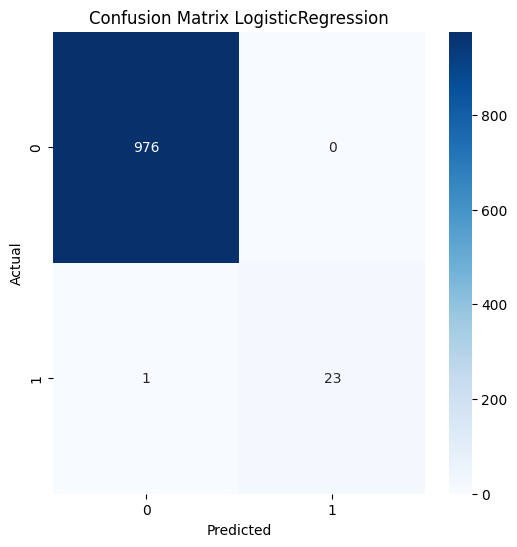

In [111]:
draw_confusion_matrix("LogisticRegression", lg)

In [77]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [78]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [113]:
predict_model("LinearDiscriminantAnalysis", lda)

LinearDiscriminantAnalysis:
MSE = 0.1 %, Accuracy score = 99.9 %


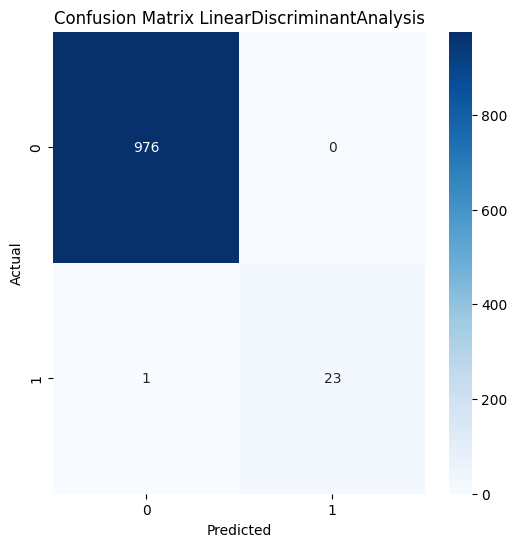

In [118]:
draw_confusion_matrix("LinearDiscriminantAnalysis", lda)

In [81]:
from sklearn.neighbors import KNeighborsClassifier

In [82]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [114]:
predict_model("KNeighborsClassifier", knn)

KNeighborsClassifier:
MSE = 2.6 %, Accuracy score = 97.4 %


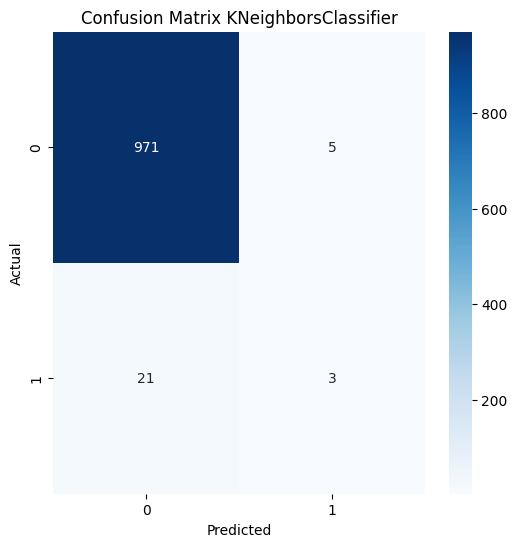

In [119]:
draw_confusion_matrix("KNeighborsClassifier", knn)

In [85]:
from sklearn.naive_bayes import GaussianNB

In [86]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [115]:
predict_model("GaussianNB", nb)

GaussianNB:
MSE = 0.3 %, Accuracy score = 99.7 %


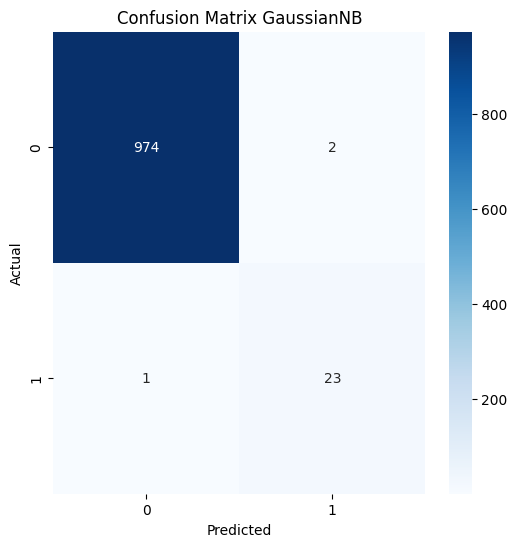

In [120]:
draw_confusion_matrix("GaussianNB", nb)

In [92]:
from sklearn.tree import DecisionTreeClassifier

In [93]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [116]:
predict_model("DecisionTreeClassifier", dt)

DecisionTreeClassifier:
MSE = 0.3 %, Accuracy score = 99.7 %


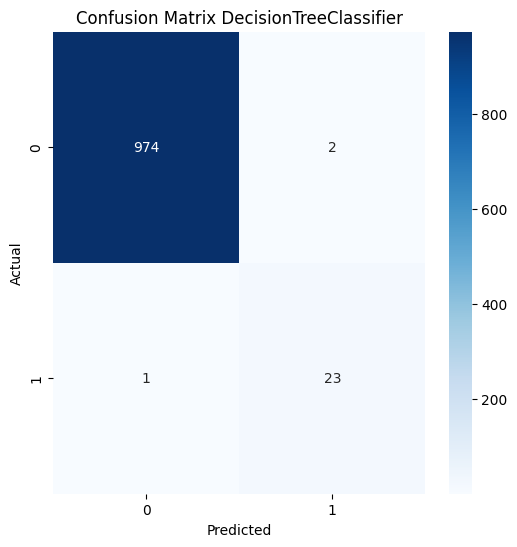

In [121]:
draw_confusion_matrix("DecisionTreeClassifier", dt)

In [96]:
from sklearn.svm import SVC

In [97]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [117]:
predict_model("SVC", svm)

SVC:
MSE = 0.1 %, Accuracy score = 99.9 %


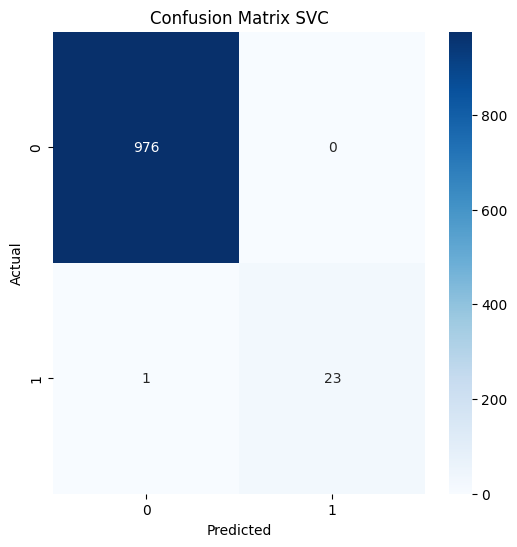

In [122]:
draw_confusion_matrix("SVC", svm)

In [123]:
from tensorflow import keras

In [167]:
model = keras.Sequential([
    keras.layers.Dense(32, input_shape=(X_train.shape[1],),activation="relu"),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

C:\Users\Vlad\Desktop\ml_dl\venv\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [168]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_34 (Dense)                     │ (None, 32)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,777 (30.38 KB)

 Trainable params: 7,777 (30.38 KB)

 Non-trainable params: 0 (0.00 B)

In [169]:
early_stop = keras.callbacks.EarlyStopping(patience=4, monitor="val_loss")

In [170]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [171]:
history = model.fit(X_train, y_train, epochs=50, validation_split=0.1, callbacks=[early_stop])

Epoch 1/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9409 - loss: 0.8493 - val_accuracy: 0.9578 - val_loss: 0.2155
Epoch 2/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step - accuracy: 0.9676 - loss: 0.1333 - val_accuracy: 0.9578 - val_loss: 0.2778
Epoch 3/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step - accuracy: 0.9599 - loss: 0.1817 - val_accuracy: 0.9589 - val_loss: 0.1320
Epoch 4/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step - accuracy: 0.9632 - loss: 0.1505 - val_accuracy: 0.9600 - val_loss: 0.1231
Epoch 5/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step - accuracy: 0.9680 - loss: 0.1113 - val_accuracy: 0.9622 - val_loss: 0.1095
Epoch 6/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step - accuracy: 0.9699 - loss: 0.1096 - val_accuracy: 0.9578 - val_loss: 0.2322
Epoch 7/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step - accuracy: 0.9604 - loss: 0.1350 - val_accuracy: 0.9644 - val_loss: 0.1114
Epoch 8/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step - accuracy: 0.9560 - loss: 0.1515 - va

In [172]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss = {round(loss * 100,2)} %")
print(f"Accuracy = {round(accuracy * 100,2)} %")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step - accuracy: 0.9680 - loss: 0.0783
Loss = 7.35 %
Accuracy = 97.7 %


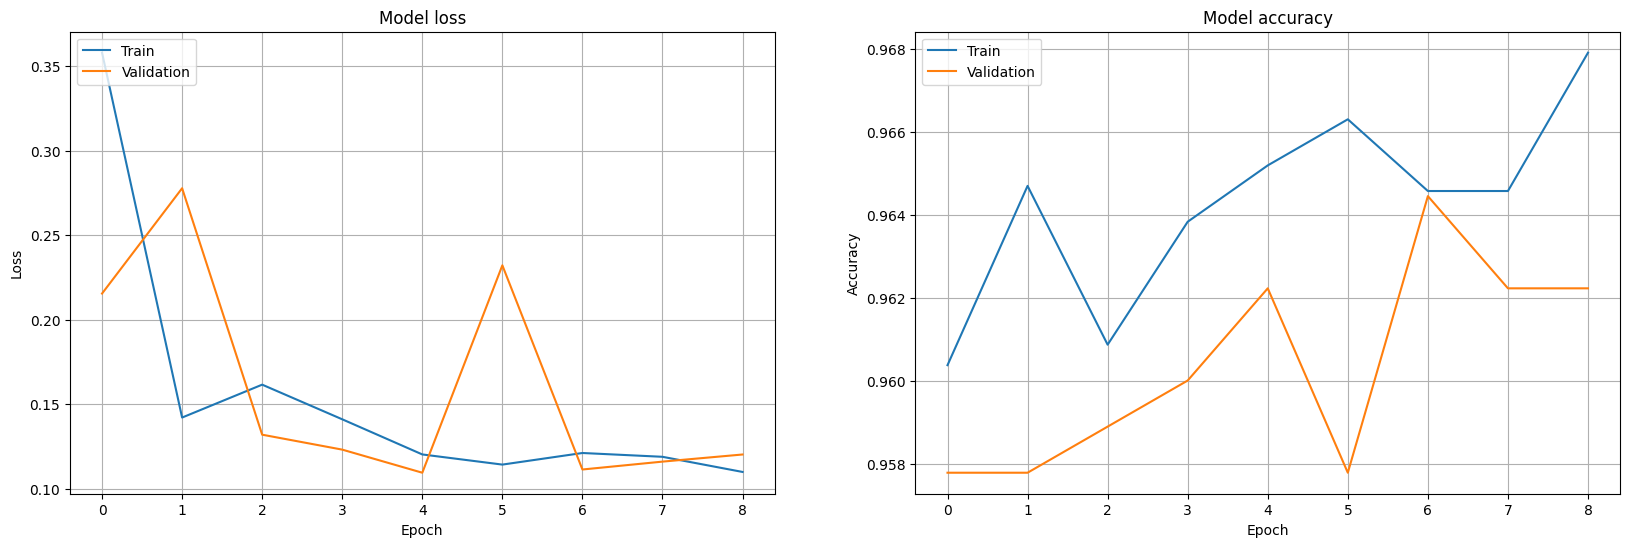

In [173]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

ax[0].plot(history.history['loss'], label='Train')
ax[0].plot(history.history['val_loss'], label='Validation')
ax[0].set_title('Model loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend(loc='upper left')
ax[0].grid(True)

ax[1].plot(history.history['accuracy'], label='Train')
ax[1].plot(history.history['val_accuracy'], label='Validation')
ax[1].set_title('Model accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend(loc='upper left')
ax[1].grid(True)
plt.show()